In [2]:
# import World Bank data
import wbdata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from scipy import stats



In [4]:
#Search All Countries in wbdata
wbdata.search_countries("")

ABW	Aruba
AFG	Afghanistan
AFR	Africa
AGO	Angola
ALB	Albania
AND	Andorra
ANR	Andean Region
ARB	Arab World
ARE	United Arab Emirates
ARG	Argentina
ARM	Armenia
ASM	American Samoa
ATG	Antigua and Barbuda
AUS	Australia
AUT	Austria
AZE	Azerbaijan
BDI	Burundi
BEA	East Asia & Pacific (IBRD-only countries)
BEC	Europe & Central Asia (IBRD-only countries)
BEL	Belgium
BEN	Benin
BFA	Burkina Faso
BGD	Bangladesh
BGR	Bulgaria
BHI	IBRD countries classified as high income
BHR	Bahrain
BHS	Bahamas, The
BIH	Bosnia and Herzegovina
BLA	Latin America & the Caribbean (IBRD-only countries)
BLR	Belarus
BLZ	Belize
BMN	Middle East & North Africa (IBRD-only countries)
BMU	Bermuda
BOL	Bolivia
BRA	Brazil
BRB	Barbados
BRN	Brunei Darussalam
BSS	Sub-Saharan Africa (IBRD-only countries)
BTN	Bhutan
BWA	Botswana
CAA	Sub-Saharan Africa (IFC classification)
CAF	Central African Republic
CAN	Canada
CEA	East Asia and the Pacific (IFC classification)
CEB	Central Europe and the Baltics
CEU	Europe and Central Asia (IFC classificati

In [191]:
# Get data on all countries
wbdata.get_data("IQ.CPA.GNDR.XQ")


[{'indicator': {'id': 'IQ.CPA.GNDR.XQ',
   'value': 'CPIA gender equality rating (1=low to 6=high)'},
  'country': {'id': '1A', 'value': 'Arab World'},
  'value': '2.58333333333333',
  'decimal': '1',
  'date': '2017'},
 {'indicator': {'id': 'IQ.CPA.GNDR.XQ',
   'value': 'CPIA gender equality rating (1=low to 6=high)'},
  'country': {'id': '1A', 'value': 'Arab World'},
  'value': '2.7',
  'decimal': '1',
  'date': '2016'},
 {'indicator': {'id': 'IQ.CPA.GNDR.XQ',
   'value': 'CPIA gender equality rating (1=low to 6=high)'},
  'country': {'id': '1A', 'value': 'Arab World'},
  'value': '2.7',
  'decimal': '1',
  'date': '2015'},
 {'indicator': {'id': 'IQ.CPA.GNDR.XQ',
   'value': 'CPIA gender equality rating (1=low to 6=high)'},
  'country': {'id': '1A', 'value': 'Arab World'},
  'value': '2.8',
  'decimal': '1',
  'date': '2014'},
 {'indicator': {'id': 'IQ.CPA.GNDR.XQ',
   'value': 'CPIA gender equality rating (1=low to 6=high)'},
  'country': {'id': '1A', 'value': 'Arab World'},
  'valu

In [195]:
# Dataframe per category with all countries
CPIA_all = pd.DataFrame(wbdata.get_data("IQ.CPA.GNDR.XQ"))



In [196]:
#Set column 'value' as type 'float' and round the value to zero decimals
CPIA_all['value'] = CPIA_all.value.astype(float).round(1)
CPIA_all['date'] = CPIA_all.date.astype(int)

In [197]:
# Clean up column 'country' and ' indicator'
CPIA_all['country_code'] = CPIA_all.country.astype(str).str.slice(8,10)
CPIA_all['country'] = CPIA_all.country.astype(str).str.slice(23,-2)
CPIA_all['indicator'] = CPIA_all.indicator.astype(str).str.slice(35,-2)
CPIA_all

,country,date,decimal,indicator,value,country_code
0,Arab World,2017,1,CPIA gender equality rating (1=low to 6=high),2.6,1A
1,Arab World,2016,1,CPIA gender equality rating (1=low to 6=high),2.7,1A
2,Arab World,2015,1,CPIA gender equality rating (1=low to 6=high),2.7,1A
3,Arab World,2014,1,CPIA gender equality rating (1=low to 6=high),2.8,1A
4,Arab World,2013,1,CPIA gender equality rating (1=low to 6=high),2.8,1A
5,Arab World,2012,1,CPIA gender equality rating (1=low to 6=high),2.8,1A
6,Arab World,2011,1,CPIA gender equality rating (1=low to 6=high),2.8,1A
7,Arab World,2010,1,CPIA gender equality rating (1=low to 6=high),2.9,1A
8,Arab World,2009,1,CPIA gender equality rating (1=low to 6=high),2.8,1A
9,Arab World,2008,1,CPIA gender equality rating (1=low to 6=high),2.7,1A


In [198]:
# if you want to group the countries. However this is not a good metric because some countries have more data points than other countries.
#CPIA_all_grouped = CPIA_all.groupby(['country']).sum()
#CPIA_all_grouped

In [199]:
# Top 15 Countries with worst 'CPA' rating

# Filter the dataset on 'value' bigger or equal to zero (to not show NaN values) and on a specific 'date'
# Here i have chosen the date '2008'
CPIA_all_year_alpha = CPIA_all.loc[(CPIA_all['date'] == 2017) & (CPIA_all.country_code.str.isalpha())]
CPIA_OnlyCountries = CPIA_all_year_alpha[17:]
CPIA_OnlyCountries

#Sort CPIA by 'value' in a descending order
#CPIA_all_year.sort_values(by='value', ascending=False )

#Count all the countries that received a rating in that year
#CPIA_all_year.country.count()

#sort the countries by 'value' (their rating) at 'date' .. and only show the Top 25 (sort in descending order and slice)
CPIA_worst15 = CPIA_OnlyCountries.sort_values(by='value', ascending=True)[:15]

#to .csv file 
CPIA_worst15.to_csv("CPIA_worst15.csv", sep=',', encoding='utf-8')

#DataFrame
CPIA_worst15

,country,date,decimal,indicator,value,country_code
2726,Afghanistan,2017,1,CPIA gender equality rating (1=low to 6=high),1.5,AF
15138,"Yemen, Rep.",2017,1,CPIA gender equality rating (1=low to 6=high),1.5,YE
12934,Somalia,2017,1,CPIA gender equality rating (1=low to 6=high),2.0,SO
7482,Guinea-Bissau,2017,1,CPIA gender equality rating (1=low to 6=high),2.0,GW
13050,South Sudan,2017,1,CPIA gender equality rating (1=low to 6=high),2.0,SS
10208,"Micronesia, Fed. Sts.",2017,1,CPIA gender equality rating (1=low to 6=high),2.5,FM
8642,Kiribati,2017,1,CPIA gender equality rating (1=low to 6=high),2.5,KI
13456,Sudan,2017,1,CPIA gender equality rating (1=low to 6=high),2.5,SD
7598,Haiti,2017,1,CPIA gender equality rating (1=low to 6=high),2.5,HT
11078,Niger,2017,1,CPIA gender equality rating (1=low to 6=high),2.5,NE


In [200]:
# Puur om de 'niet-landen' weg te halen. hoeft niet te gebruiken en is per databestand anders.
CPIA_2007_2017 = CPIA_all.loc[(CPIA_all['date'] >= 2007) & (CPIA_all['date'] <= 2017) & (CPIA_all.country_code.str.isalpha())]
CPIA_2007_2017

,country,date,decimal,indicator,value,country_code
406,Euro area,2017,1,CPIA gender equality rating (1=low to 6=high),NaN,XC
407,Euro area,2016,1,CPIA gender equality rating (1=low to 6=high),NaN,XC
408,Euro area,2015,1,CPIA gender equality rating (1=low to 6=high),NaN,XC
409,Euro area,2014,1,CPIA gender equality rating (1=low to 6=high),NaN,XC
410,Euro area,2013,1,CPIA gender equality rating (1=low to 6=high),NaN,XC
411,Euro area,2012,1,CPIA gender equality rating (1=low to 6=high),NaN,XC
412,Euro area,2011,1,CPIA gender equality rating (1=low to 6=high),NaN,XC
413,Euro area,2010,1,CPIA gender equality rating (1=low to 6=high),NaN,XC
414,Euro area,2009,1,CPIA gender equality rating (1=low to 6=high),NaN,XC
415,Euro area,2008,1,CPIA gender equality rating (1=low to 6=high),NaN,XC


In [201]:
CPIA_worst15_2007_2017 = CPIA_2007_2017[CPIA_2007_2017.country.isin(list(CPIA_worst15.country))]
CPIA_worst15_2007_2017
CPIA_years = CPIA_worst15_2007_2017.sort_values(by='date', ascending=True)
#to .csv file 
CPIA_years.to_csv("CPIA_years.csv", sep=',', encoding='utf-8')

CPIA_years

,country,date,decimal,indicator,value,country_code
15148,"Yemen, Rep.",2007,1,CPIA gender equality rating (1=low to 6=high),2.0,YE
5288,"Congo, Dem. Rep.",2007,1,CPIA gender equality rating (1=low to 6=high),3.0,CD
4940,Chad,2007,1,CPIA gender equality rating (1=low to 6=high),2.5,TD
11378,Pakistan,2007,1,CPIA gender equality rating (1=low to 6=high),2.0,PK
6274,Eritrea,2007,1,CPIA gender equality rating (1=low to 6=high),3.5,ER
13060,South Sudan,2007,1,CPIA gender equality rating (1=low to 6=high),NaN,SS
11088,Niger,2007,1,CPIA gender equality rating (1=low to 6=high),2.5,NE
2736,Afghanistan,2007,1,CPIA gender equality rating (1=low to 6=high),2.0,AF
10218,"Micronesia, Fed. Sts.",2007,1,CPIA gender equality rating (1=low to 6=high),NaN,FM
7492,Guinea-Bissau,2007,1,CPIA gender equality rating (1=low to 6=high),2.5,GW


In [202]:
#CPIA_years[CPIA_years.country =='Somalia']

# Backwards fill missing data
CPIA_years.loc[CPIA_years['country'] == 'Somalia'] = CPIA_years.loc[(CPIA_years['country'] == 'Somalia')].bfill()
CPIA_years[CPIA_years.country =='Micronesia, Fed. Sts.'] = CPIA_years[(CPIA_years.country =='Micronesia, Fed. Sts.')].bfill()
CPIA_years[CPIA_years.country =='South Sudan'] = CPIA_years[(CPIA_years.country =='South Sudan')].bfill()

In [203]:
CPIA_years

,country,date,decimal,indicator,value,country_code
15148,"Yemen, Rep.",2007,1,CPIA gender equality rating (1=low to 6=high),2.0,YE
5288,"Congo, Dem. Rep.",2007,1,CPIA gender equality rating (1=low to 6=high),3.0,CD
4940,Chad,2007,1,CPIA gender equality rating (1=low to 6=high),2.5,TD
11378,Pakistan,2007,1,CPIA gender equality rating (1=low to 6=high),2.0,PK
6274,Eritrea,2007,1,CPIA gender equality rating (1=low to 6=high),3.5,ER
13060,South Sudan,2007,1,CPIA gender equality rating (1=low to 6=high),2.5,SS
11088,Niger,2007,1,CPIA gender equality rating (1=low to 6=high),2.5,NE
2736,Afghanistan,2007,1,CPIA gender equality rating (1=low to 6=high),2.0,AF
10218,"Micronesia, Fed. Sts.",2007,1,CPIA gender equality rating (1=low to 6=high),2.5,FM
7492,Guinea-Bissau,2007,1,CPIA gender equality rating (1=low to 6=high),2.5,GW


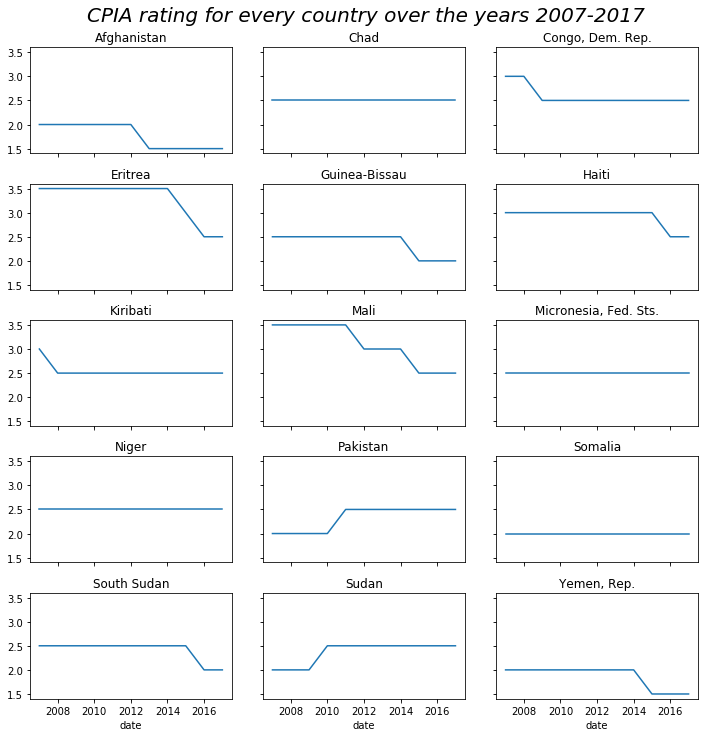

In [204]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)) = plt.subplots(nrows=5, ncols=3, sharex=True, sharey=True, figsize=(10,10),)


CPIA_years[CPIA_years['country'] == 'Afghanistan'].plot(x='date', y='value', legend=False, ax=ax1)
ax1.set_title("Afghanistan")
CPIA_years[CPIA_years['country'] == 'Chad'].plot(x='date', y='value', legend=False, ax=ax2)
ax2.set_title("Chad")
CPIA_years[CPIA_years['country'] == 'Congo, Dem. Rep.'].plot(x='date', y='value', legend=False, ax=ax3)
ax3.set_title("Congo, Dem. Rep.")
CPIA_years[CPIA_years['country'] == 'Eritrea'].plot(x='date', y='value', legend=False, ax=ax4)
ax4.set_title("Eritrea")
CPIA_years[CPIA_years['country'] == 'Guinea-Bissau'].plot(x='date', y='value', legend=False, ax=ax5)
ax5.set_title("Guinea-Bissau")
CPIA_years[CPIA_years['country'] == 'Haiti'].plot(x='date', y='value', legend=False, ax=ax6)
ax6.set_title("Haiti")
CPIA_years[CPIA_years['country'] == 'Kiribati'].plot(x='date', y='value', legend=False, ax=ax7)
ax7.set_title("Kiribati")
CPIA_years[CPIA_years['country'] == 'Mali'].plot(x='date', y='value', legend=False, ax=ax8)
ax8.set_title("Mali")
CPIA_years[CPIA_years['country'] == 'Micronesia, Fed. Sts.'].plot(x='date', y='value', legend=False, ax=ax9)
ax9.set_title("Micronesia, Fed. Sts.")
CPIA_years[CPIA_years['country'] == 'Niger'].plot(x='date', y='value', legend=False, ax=ax10)
ax10.set_title("Niger")
CPIA_years[CPIA_years['country'] == 'Pakistan'].plot(x='date', y='value', legend=False, ax=ax11)
ax11.set_title("Pakistan")
CPIA_years[CPIA_years['country'] == 'Somalia'].plot(x='date', y='value', legend=False, ax=ax12)
ax12.set_title("Somalia")
CPIA_years[CPIA_years['country'] == 'South Sudan'].plot(x='date', y='value', legend=False, ax=ax13)
ax13.set_title("South Sudan")
CPIA_years[CPIA_years['country'] == 'Sudan'].plot(x='date', y='value', legend=False, ax=ax14)
ax14.set_title("Sudan")
CPIA_years[CPIA_years['country'] == 'Yemen, Rep.'].plot(x='date', y='value', legend=False, ax=ax15)
ax15.set_title("Yemen, Rep.")

plt.suptitle("CPIA rating for every country over the years 2007-2017", fontsize=20, fontweight=0, color='black', style='italic', y=1.02)


# If you don't do tight_layout() you'll have weird overlaps
plt.tight_layout()

In [67]:
#Lineaire regressie nog niet klaar
x = np.array(CPIA_OnlyCountries['value'])
y = np.array(NOD_OnlyCountries['value'])
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

ValueError: all the input array dimensions except for the concatenation axis must match exactly